In [ ]:
!pip install tensorflow keras opencv-python

In [ ]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [ ]:
# Importing necessary libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/archive/flower_images'
valid_path = '/content/drive/MyDrive/archive/flowers'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
for layer in inception.layers:
  layer.tarinable= False

folders = glob ('/content/drive/MyDrive/archive/flower_images/*')

In [ ]:
x = Flatten()(inception.output)

prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [ ]:
model.compile(
    loss='categprical_crossntropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale = 1./225,
                                 shear_range = 0.2,
                                 zoom_range = 0.2,
                                 horizontal_flip = True)

train_datagen= ImageDataGenerator(rescale = 1./225)


In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/archive/flower_images',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 210 images belonging to 1 classes.


In [ ]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/archive/flowers',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 603 images belonging to 1 classes.


In [ ]:


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
    )

Epoch 1/10


<ipython-input-38-49ee630a1c51>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


7/7 [==============================] - 752s 111s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 4s 604ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 4s 682ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 4s 604ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 4s 598ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 7s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 4s 613ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 

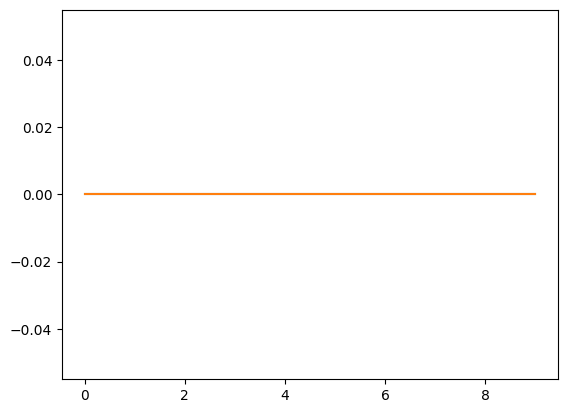

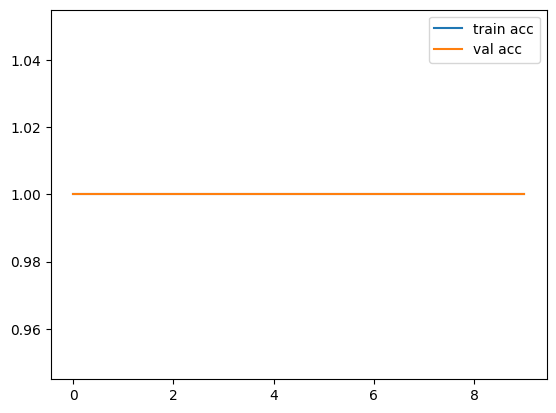

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# plot the loss

plt.plot(r.history['loss'], label='train loss')

plt.plot(r.history['val_loss'],label='val loss')
plt.show()
plt.savefig('LossVal_loss')

plt.legend()

# plot the accuracy

plt.plot(r.history['accuracy'], label='train acc')

plt.plot(r.history['val_accuracy'], label='val acc')

plt.legend()
plt.show()

plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred = model.predict(test_set)

19/19 [==============================] - 4s 126ms/step


In [ ]:
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_inception.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/archive/flowers/flowers/00_002.png',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[ 38.,  49.,  30.],
        [ 38.,  49.,  30.],
        [ 37.,  50.,  30.],
        ...,
        [ 32.,  35.,  26.],
        [ 39.,  43.,  32.],
        [ 39.,  43.,  32.]],

       [[ 38.,  49.,  30.],
        [ 38.,  49.,  30.],
        [ 37.,  50.,  30.],
        ...,
        [ 32.,  35.,  26.],
        [ 39.,  43.,  32.],
        [ 39.,  43.,  32.]],

       [[ 36.,  48.,  29.],
        [ 36.,  48.,  29.],
        [ 37.,  48.,  31.],
        ...,
        [ 83.,  78.,  64.],
        [ 79.,  73.,  62.],
        [ 79.,  73.,  62.]],

       ...,

       [[107., 135.,  85.],
        [107., 135.,  85.],
        [111., 140.,  91.],
        ...,
        [  5.,   5.,   5.],
        [  3.,   3.,   3.],
        [  3.,   3.,   3.]],

       [[ 97., 128.,  81.],
        [ 97., 128.,  81.],
        [ 96., 129.,  81.],
        ...,
        [  7.,   7.,   7.],
        [  5.,   5.,   5.],
        [  5.,   5.,   5.]],

       [[ 97., 128.,  81.],
        [ 97., 128.,  81.],
        [ 96., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[1.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 43ms/step


In [ ]:
a==0

array([ True])

In [ ]:
# Step 2: Load Pre-Trained Model
from tensorflow.keras.models import load_model

# Assuming 'model.h5' is your saved model file
model = load_model('model_inception.h5')

# Step 3: Preprocess the Image
from tensorflow.keras.preprocessing import image
import numpy as np

# Assuming 'test_image.jpg' is the name of your test image
img_path = '/content/drive/MyDrive/archive/flowers/flowers/00_010.png'

# Load the image, target size should be the same as what was used during training
img = image.load_img(img_path, target_size=(224, 224))

# Convert the image to an array
img = image.img_to_array(img)

# Expand dimensions to match the shape used for training
img = np.expand_dims(img, axis=0)

# Normalize the image (if required)
# For example, if you used rescale=1./255 during training
img = img / 255.0

# Step 4: Make Predictions
predictions = model.predict(img)

# Assuming it's a classification problem with class labels
# If you used softmax activation in the last layer, you'll get probabilities for each class
# You can use np.argmax to get the predicted class
predicted_class = np.argmax(predictions)

# Assuming you have a list of class labels
class_labels = ['class1', 'class2', 'class3']

# Get the predicted label
predicted_label = class_labels[predicted_class]

print(f"The predicted class is: {predicted_label}")


1/1 [==============================] - 2s 2s/step
The predicted class is: class1
